In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import requests

%matplotlib inline

In [3]:
def get_covid_data(url, local_filename):
    '''
    It takes time to download the file every time
    so I downloaded the csv file and if there is a local file, we would not send another request.
    '''
    local_file_path = Path(local_filename)
    if not local_file_path.is_file():
        covid_df = pd.read_csv(url)
        covid_df.to_csv(local_file_path, index=False)
    else:
        covid_df = pd.read_csv(local_file_path)

    return covid_df

url = "https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/owid-covid-data.csv"
local_filename = 'covid_data.csv'

In [4]:
covid_df = get_covid_data(url, local_filename)

In [5]:
covid_df.sample(100)

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
10500,AIA,North America,Anguilla,2021-12-03,1414.0,28.0,11.429,3.0,0.0,0.000,...,NaN,NaN,NaN,81.88,NaN,15877.0,NaN,NaN,NaN,NaN
221598,NIC,North America,Nicaragua,2023-02-17,15627.0,0.0,2.143,245.0,0.0,0.000,...,NaN,NaN,0.90,74.48,0.660,6948395.0,NaN,NaN,NaN,NaN
231195,OWID_NIR,Europe,Northern Ireland,2020-11-12,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1896000.0,NaN,NaN,NaN,NaN
196532,MUS,Africa,Mauritius,2023-07-04,308345.0,0.0,19.429,1053.0,0.0,0.000,...,40.7,NaN,3.40,74.99,0.804,1299478.0,NaN,NaN,NaN,NaN
28686,BLR,Europe,Belarus,2021-11-12,621689.0,1981.0,1951.143,4805.0,16.0,15.571,...,46.1,NaN,11.00,74.79,0.823,9534956.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141117,ISL,Europe,Iceland,2023-06-24,208728.0,0.0,3.000,186.0,0.0,0.000,...,15.2,NaN,2.91,82.99,0.949,372903.0,NaN,NaN,NaN,NaN
61264,CHL,South America,Chile,2022-11-22,4880884.0,3636.0,5464.571,62211.0,24.0,25.571,...,41.5,NaN,2.11,80.18,0.851,19603736.0,NaN,NaN,NaN,NaN
351272,ZMB,Africa,Zambia,2020-11-26,17535.0,69.0,36.429,357.0,0.0,0.143,...,24.7,13.938,2.00,63.89,0.584,20017670.0,NaN,NaN,NaN,NaN
338043,URY,South America,Uruguay,2022-06-24,951948.0,0.0,1153.000,7312.0,0.0,3.143,...,19.9,NaN,2.80,77.91,0.817,3422796.0,NaN,NaN,NaN,NaN


In [6]:
covid_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 353744 entries, 0 to 353743
Data columns (total 67 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   iso_code                                    353744 non-null  object 
 1   continent                                   336922 non-null  object 
 2   location                                    353744 non-null  object 
 3   date                                        353744 non-null  object 
 4   total_cases                                 315748 non-null  float64
 5   new_cases                                   344151 non-null  float64
 6   new_cases_smoothed                          342892 non-null  float64
 7   total_deaths                                294071 non-null  float64
 8   new_deaths                                  344196 non-null  float64
 9   new_deaths_smoothed                         342966 non-null  float64
 

## 1. Univariate Exploration

Here we want to understand the frequency and distribution of a single variable.

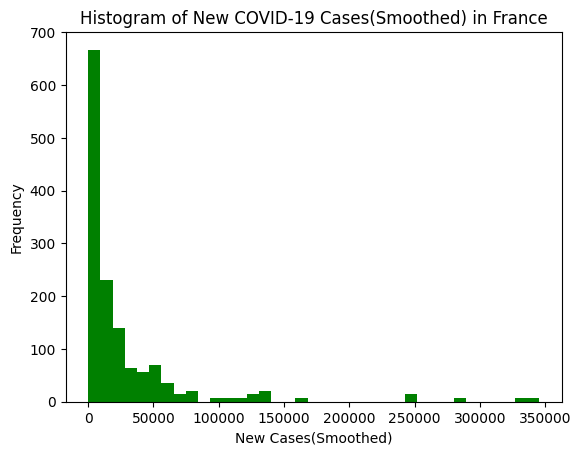

In [7]:
# histograms of new cases(smoothed) in france 

france_new_cases_smoothed = covid_df[covid_df['location'] == 'France']['new_cases_smoothed'].dropna()

bins_sqrt = int(np.sqrt(len(france_new_cases_smoothed)))


plt.hist(france_new_cases_smoothed, bins=bins_sqrt,color='green')  
plt.xlabel('New Cases(Smoothed)')
plt.ylabel('Frequency')
plt.title('Histogram of New COVID-19 Cases(Smoothed) in France')
plt.show()

Observations:
- The distribution of new COVID-19 cases (smoothed) in France is highly right-skewed.
- The majority of the data points are concentrated in the first bin, suggesting that on most days, the number of new cases was relatively low.
- The tail of the distribution extends to the right, suggesting that there were a few days with a higher number of new case. 

In [8]:
def return_cols_row(list_name, cols = 4):
    n = len(list_name)
    rows = int(np.ceil(n / cols))  

    return rows, cols

In [9]:
# create lists for each continent
continent_list = covid_df['continent'].dropna().unique().tolist()

continent_list

['Asia', 'Europe', 'Africa', 'Oceania', 'North America', 'South America']

In [10]:
countries_list = covid_df['location'].dropna().unique().tolist()
len(countries_list)

# as there are 255 countries, it would be better if we focus on several countries
target_countries_list = ['France','Germany','Kenya','Canada','Australia','India']
target_countries_list

['France', 'Germany', 'Kenya', 'Canada', 'Australia', 'India']

In [11]:
# histograms of new cases(smoothed) in each country 

def create_histograms(ax, name):
    continent_df = covid_df[covid_df['location'] == name]
    new_cases_smoothed = continent_df['new_cases_smoothed'].dropna()

    bins_sqrt = int(np.sqrt(len(new_cases_smoothed))) if len(new_cases_smoothed) > 0 else 1


    ax.hist(new_cases_smoothed, bins=bins_sqrt,color='green')  
    ax.set_xlabel('New Cases(Smoothed)')
    ax.set_ylabel('Frequency')
    ax.set_title(f'{name}')


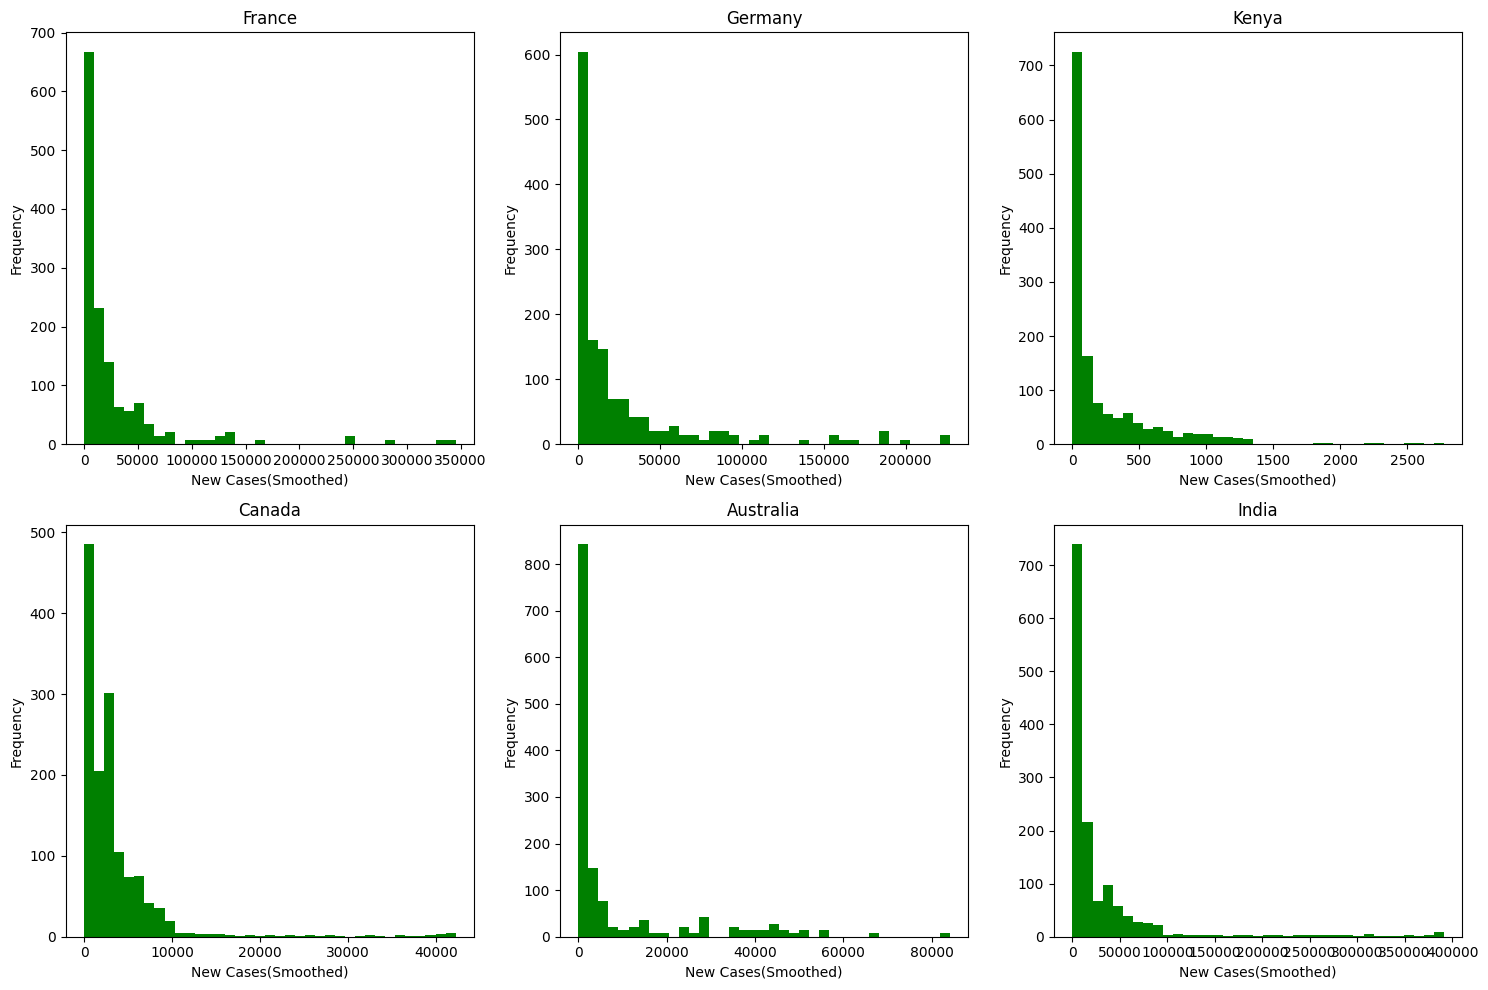

In [12]:
rows, cols = return_cols_row(target_countries_list, cols = 3)

fig, axs = plt.subplots(rows, cols, figsize=(15, 5 * rows))

axs = axs.flatten()

for idx, name in enumerate(target_countries_list):
    create_histograms(axs[idx], name)

for j in range(idx + 1, rows * cols):
    axs[j].set_visible(False)
    
plt.tight_layout()
plt.show()

Observations:

1. These countries all have right-skewed distributions, suggesting that there were few cases on most days.
2. The number of new cases on the X-axis suggests that we should consider the population size when doing next steps.

## 2. Bivariate Visualization

### 2.1 How total cases increase over time in these countries?

In [26]:

def create_lineplot_cases(ax, country_name):
    country_df = covid_df[covid_df['location'] == country_name].copy()
    country_df['date'] = pd.to_datetime(country_df['date'])

    ax.plot(country_df['date'], country_df['total_cases'], label='Total Cases', color='blue', linestyle='-')
    ax.plot(country_df['date'], country_df['people_fully_vaccinated_per_hundred'], label='New Cases', color='red', linestyle='--')

    ax.set_xlabel('Date')
    ax.set_ylabel('Cases')
    ax.set_title(f'{country_name}')


In [27]:
def create_plots(list_name, plot_function, cols = 4):
    rows, cols = return_cols_row(list_name, cols)

    fig, axs = plt.subplots(rows, cols, figsize=(15, 5 * rows))

    axs = axs.flatten()

    for idx, name in enumerate(list_name):
        plot_function(axs[idx], name)

    for j in range(idx + 1, rows * cols):
        axs[j].set_visible(False)
        
    plt.tight_layout()
    plt.show()

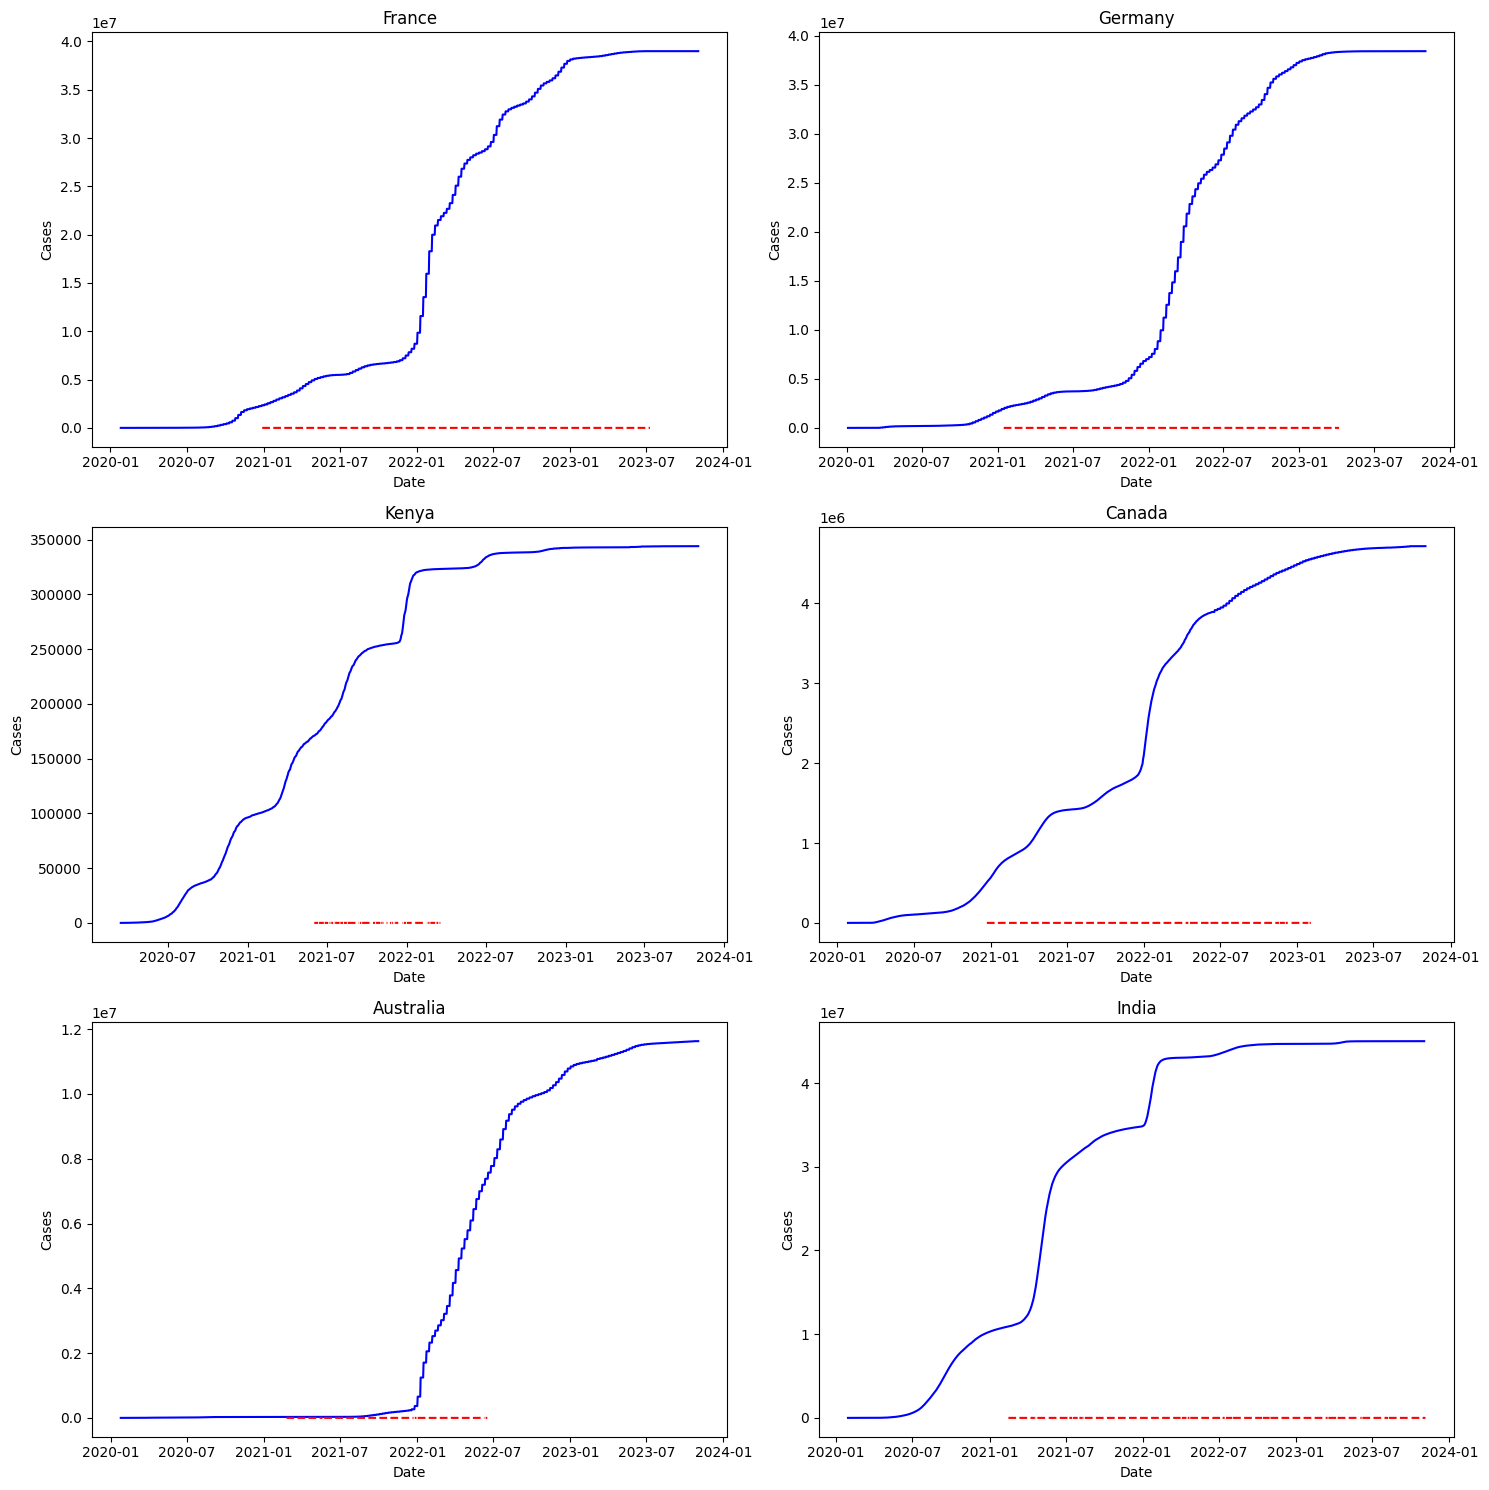

In [28]:
create_plots(target_countries_list, create_lineplot_cases, cols = 2 )

Observation:
1. Total

### 2.2 Is there a relationship between total cases and vaccination rate.

In [36]:
def create_scatter_plots(ax, country_name):
    country_df = covid_df[covid_df['location'] == country_name].copy()

    sns.scatterplot(ax=ax, x='total_cases', y='people_fully_vaccinated_per_hundred', data=country_df, alpha=0.5)
    sns.regplot(ax=ax, x='total_cases', y='people_fully_vaccinated_per_hundred', data=country_df, scatter=False, color='red')    

    ax.set_xlabel('Total Cases')
    ax.set_ylabel('People Fully Vaccinated per Hundred')
    ax.set_title(f'{country_name}')


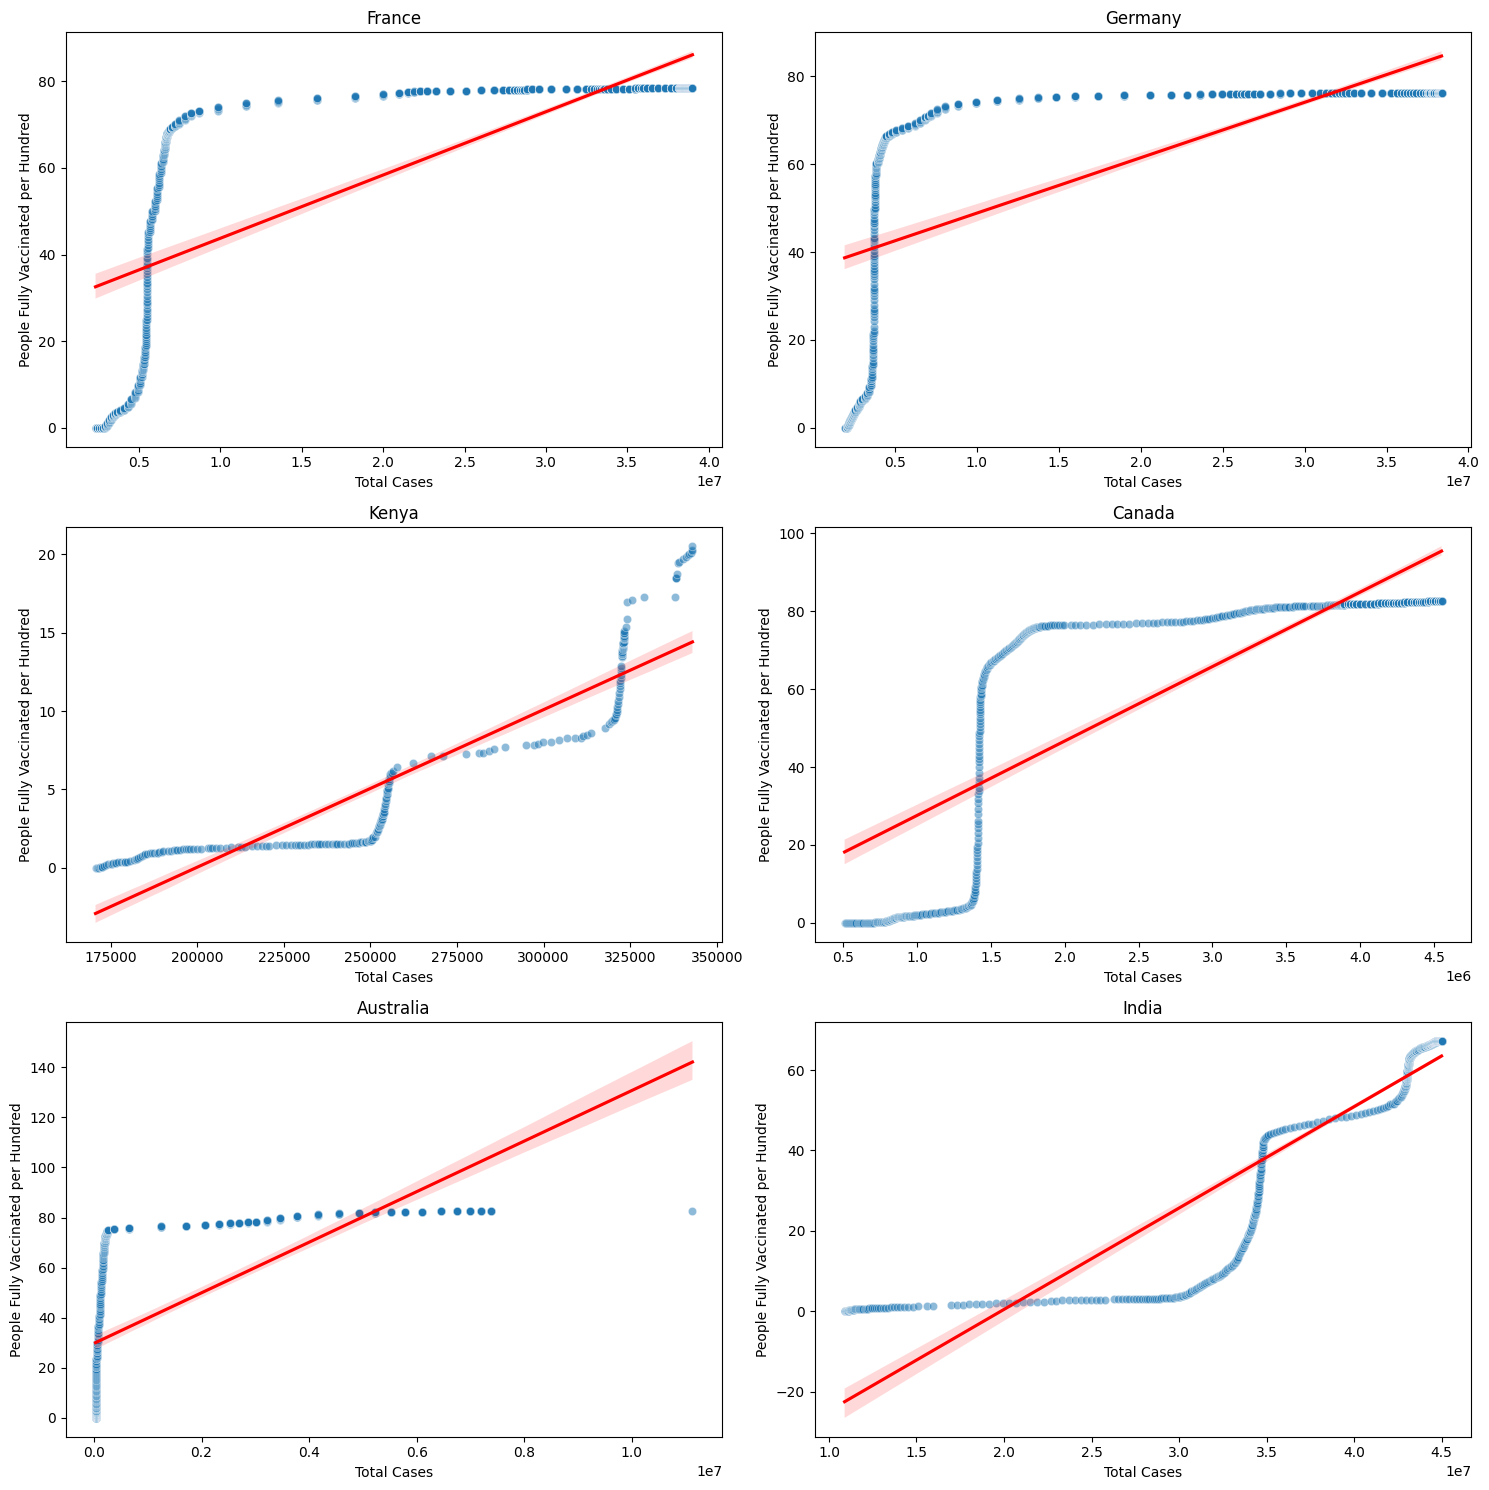

In [37]:
create_plots(target_countries_list, create_scatter_plots, cols = 2 )